# Auto Loan Default Prediction

**Objectives:** Investigate, Clean, Visualize and find correlations in the Vehicle Loan Default Prediction found here https://www.kaggle.com/datasets/avikpaul4u/vehicle-loan-default-prediction

**End Goal:** Create a classification model to predict the event of a loan default. This dataset includes only early payment defaults so this means we will be predicting early payment defaults (within the first few payment periods).

In [1]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/CarterTschumper/Auto-Loan-Default-Prediction/main/Auto_loan_data.csv"

df_train = pd.read_csv(csv_url)

df_train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,647847,58513,79332,75.63,159,24406,86,7240,4/7/1994,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
1,581370,53803,73917,74.41,159,24406,86,7239,1/1/1975,Self employed,...,0,0,0,0,0,0,4yrs 1mon,4yrs 1mon,0,0
2,647507,77318,172336,47.00,159,24307,67,7230,10/3/1996,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
3,612111,73317,101215,74.10,159,24406,86,7235,1/1/1997,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
4,509765,56759,67666,85.72,159,24406,86,7220,1/1/1963,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1


In [2]:
df_train.shape

(36306, 41)

In [3]:
df = df_train

# Note About The Anaylsis

I will be going through and visualizing the dataset to help understand what kind of applicants we are looking at, as well as the different predictor variables. This dataset includes attributes about Auto Loan recipients as well as their binary classifier for if they defaulted on their loan within the first few payments. 1 for default and 0 for paid.

In [4]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [5]:

data_dictionary = {
    "Variable Name": ["UniqueID", "loan_default", "disbursed_amount", "asset_cost", "ltv", "branch_id", "supplier_id", "manufacturer_id", "Current_pincode",  "Date.of.Birth", "Employment.Type", "DisbursalDate", "State_ID", 
        "Employee_code_ID", "MobileNo_Avl_Flag", "Aadhar_flag", "PAN_flag","VoterID_flag", "Driving_flag", "Passport_flag", "PERFORM_CNS.SCORE",
        "PERFORM_CNS.SCORE.DESCRIPTION", "PRI.NO.OF.ACCTS", "PRI.ACTIVE.ACCTS","PRI.OVERDUE.ACCTS", "PRI.CURRENT.BALANCE", "PRI.SANCTIONED.AMOUNT","PRI.DISBURSED.AMOUNT", "SEC.NO.OF.ACCTS", "SEC.ACTIVE.ACCTS","SEC.OVERDUE.ACCTS", "SEC.CURRENT.BALANCE", "SEC.SANCTIONED.AMOUNT","SEC.DISBURSED.AMOUNT", "PRIMARY.INSTAL.AMT", "SEC.INSTAL.AMT","NEW.ACCTS.IN.LAST.SIX.MONTHS", "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS","AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH", "NO.OF_INQUIRIES"
    ],
    "Description": ["Identifier for customers","Payment default in the first EMI on due date", "Amount of Loan disbursed", "Cost of the Asset", "Loan to Value of the asset", "Branch where the loan was disbursed", "Vehicle Dealer where the loan was disbursed", "Vehicle manufacturer(Hero, Honda, TVS etc.)", "Current pincode of the customer", "Date of birth of the customer", "Employment Type of the customer (Salaried/Self Employed)", "Date of disbursement", "State of disbursement", "Employee of the organization who logged the disbursement", "if Mobile no. was shared by the customer then flagged as 1", "if aadhar was shared by the customer then flagged as 1", "if pan was shared by the customer then flagged as 1", "if voter was shared by the customer then flagged as 1", "if DL was shared by the customer then flagged as 1", "if passport was shared by the customer then flagged as 1", "Bureau Score", "Bureau score description", "count of total loans taken by the customer at the time of disbursement (Primary accounts)", "count of active loans taken by the customer at the time of disbursement", "count of default accounts at the time of disbursement", "total Principal outstanding amount of the active loans at the time of disbursement", "total amount that was sanctioned for all the loans at the time of disbursement", "total amount that was disbursed for all the loans at the time of disbursement", "count of total loans taken by the customer at the time of disbursement (Secondary accounts)", "count of active loans taken by the customer at the time of disbursement", "count of default accounts at the time of disbursement", "total Principal outstanding amount of the active loans at the time of disbursement", "total amount that was sanctioned for all the loans at the time of disbursement", "total amount that was disbursed for all the loans at the time of disbursement", "EMI Amount of the primary loan", "EMI Amount of the secondary loan", "New loans taken by the customer in last 6 months before the disbursment", "Loans defaulted in the last 6 months", "Average loan tenure", "Time since first loan", "Enquiries done by the customer for loans"
    ]
}

data_dictionary_df = pd.DataFrame(data_dictionary)
print(data_dictionary_df)

                          Variable Name  \
0                              UniqueID   
1                          loan_default   
2                      disbursed_amount   
3                            asset_cost   
4                                   ltv   
5                             branch_id   
6                           supplier_id   
7                       manufacturer_id   
8                       Current_pincode   
9                         Date.of.Birth   
10                      Employment.Type   
11                        DisbursalDate   
12                             State_ID   
13                     Employee_code_ID   
14                    MobileNo_Avl_Flag   
15                          Aadhar_flag   
16                             PAN_flag   
17                         VoterID_flag   
18                         Driving_flag   
19                        Passport_flag   
20                    PERFORM_CNS.SCORE   
21        PERFORM_CNS.SCORE.DESCRIPTION   
22         

In [6]:
df.shape

(36306, 41)

In [7]:
df['UNIQUEID'].drop_duplicates(inplace=True)
df.shape

(36306, 41)

In [8]:
# DROP COLUMNS THAT AREN'T SHOULDN'T BE CONSIDERED OR AREN'T RELAVENT
df.drop(columns= ['CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'AADHAR_FLAG', 'PASSPORT_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PAN_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION'], inplace=True)

In [9]:
# What kind of dataset are we looking at?
df['LOAN_DEFAULT'].sum() / df.shape[0]

0.22957637856001764

In [10]:
# SANITY CHECK ON LTV TO MAKE SURE THE CALCULATION GIVEN MAKES SENSE
df['LTV_CHECK'] = (df['DISBURSED_AMOUNT'] / df['ASSET_COST'])*100
df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'LTV_CHECK']].sort_values(by=['LTV', 'LTV_CHECK'], ascending= [False, False])

,DISBURSED_AMOUNT,ASSET_COST,LTV,LTV_CHECK
27076,63347,68218,94.99,92.859656
9747,67282,72645,94.98,92.617524
2883,75799,82124,94.98,92.298232
15454,57559,62450,94.96,92.168135
27102,56159,60355,94.94,93.047801
...,...,...,...,...
23750,32459,164212,21.31,19.766521
28328,14799,75129,21.30,19.698119
3988,13664,75752,19.80,18.037808
16789,13914,75900,19.76,18.332016


In [11]:
# CHECKING FOR UNUSUALLY LARGE VARIANCES
(df['LTV'] - df['LTV_CHECK']).max()

40.08873085339169

In [12]:
# LOOKS LIKE THERE ARE SOME OUTLIERS. QUICK CHECK TO SEE HOW MANY VARIANCES GREATER THAN 10%
df.loc[df['LTV'] - df['LTV_CHECK'] >= 10]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LTV_CHECK
2982,651955,19679,45700,83.15,14,24143,51,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,43.061269
16865,460618,37795,67982,73.40,70,20787,120,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,55.595599
23240,523446,48013,66475,88.76,257,23824,86,Salaried,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,72.227153
23244,514864,49259,71341,84.10,257,23824,86,Self employed,1,17,...,0,3417,0,2,0,0yrs 2mon,0yrs 2mon,1,1,69.047252
24095,615022,33231,58450,75.00,146,18252,45,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,56.853721
27511,533381,47013,72551,79.94,146,16756,120,Salaried,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,64.799934


In [13]:
# 6 ROWS OUT OF OVER 36K SHOULD NOT MAKE TOO MUCH OF A DIFFERENCE IN ANALYSIS, OK TO LEAVE IN.

In [14]:
df.drop(columns= 'LTV_CHECK', inplace=True)

In [15]:
df.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
EMPLOYMENT_TYPE                        1041
MOBILENO_AVL_FLAG                         0
PERFORM_CNS_SCORE                         0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT                      0
PRIMARY_INSTAL_AMT              

# NA Values

All of the NA values are concentrated in the Employment Type. It is not specified what this means in the dataset so I took it as the loan applicant did not submit this field. Later on in the analysis I change the NA values to 'unemployed', however, this does not matter for the classification model because it is just another categorical variable.

In [16]:
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,4yrs 1mon,4yrs 1mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 0mon,0yrs 0mon
4,0yrs 0mon,0yrs 0mon


In [17]:
def convert_to_months(age_str):
    """
    Convert the string representation of average account age or credit history length
    to the total number of months.
    
    Parameters:
    age_str (str): String representation of average account age or credit history length (e.g., '0yrs 0mon').
    
    Returns:
    int: Total number of months.
    """
    years, months = age_str.split('yrs')
    
    years = int(years.strip())
    
    if 'mon' in months:
        months = int(months.replace('mon', '').strip())
    else:
        months = 0
    
    total_months = years * 12 + months
    return total_months

In [18]:
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']] = df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].applymap(convert_to_months)
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,0
1,49,49
2,0,0
3,0,0
4,0,0


In [19]:
df[df['CREDIT_HISTORY_LENGTH'] == 0].shape[0]

18472

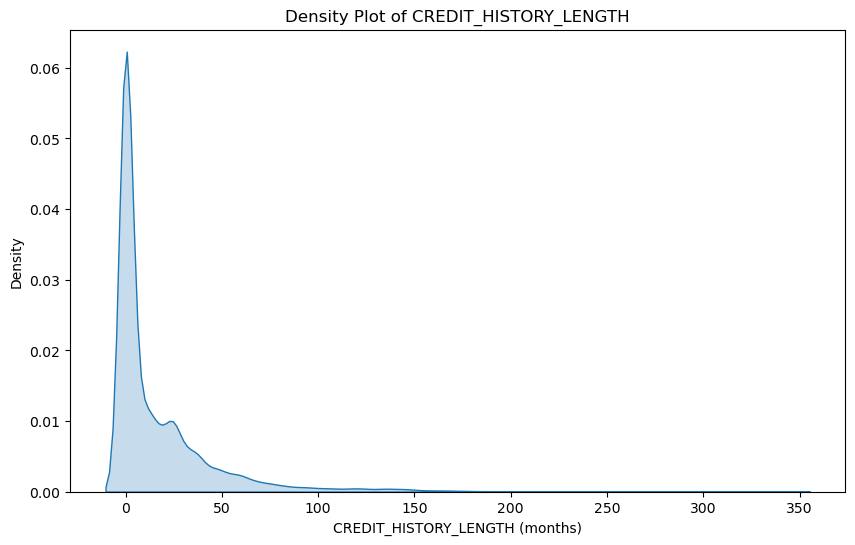

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()

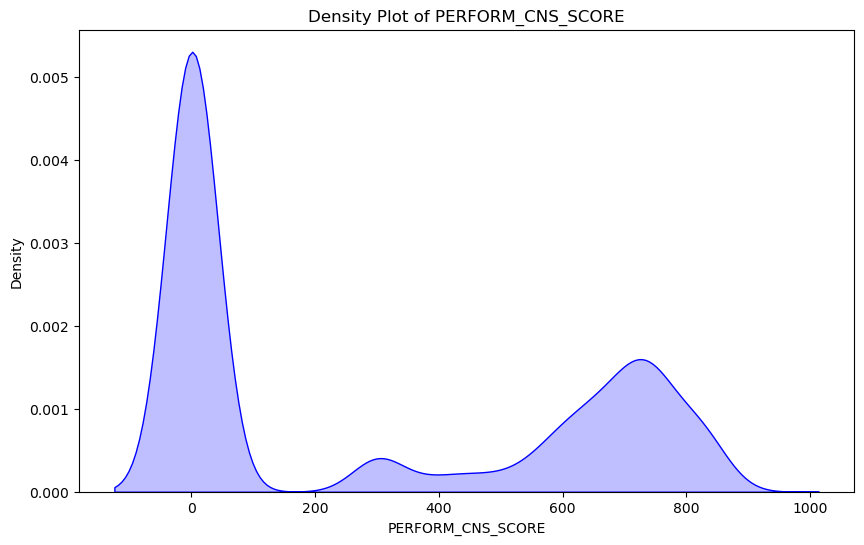

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()

In [22]:
with_credit_score_df = df.loc[(df['PERFORM_CNS_SCORE'] >= 300)]

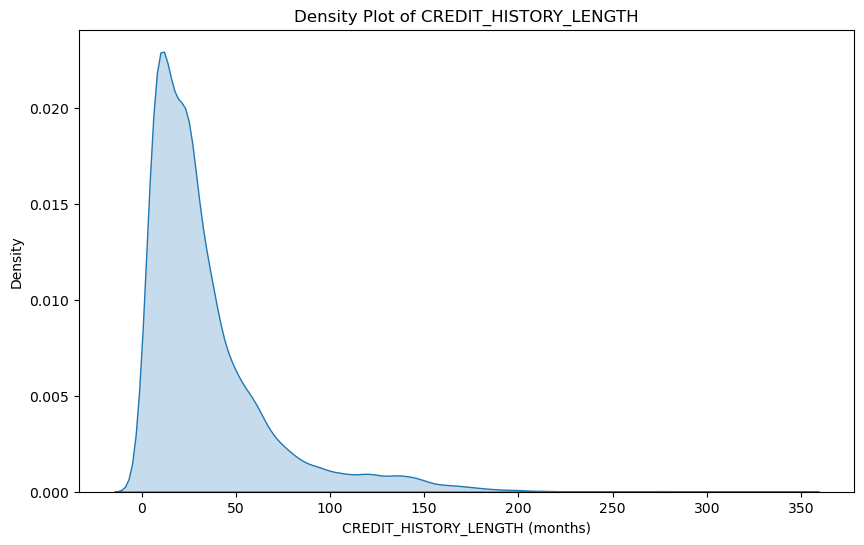

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(with_credit_score_df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()

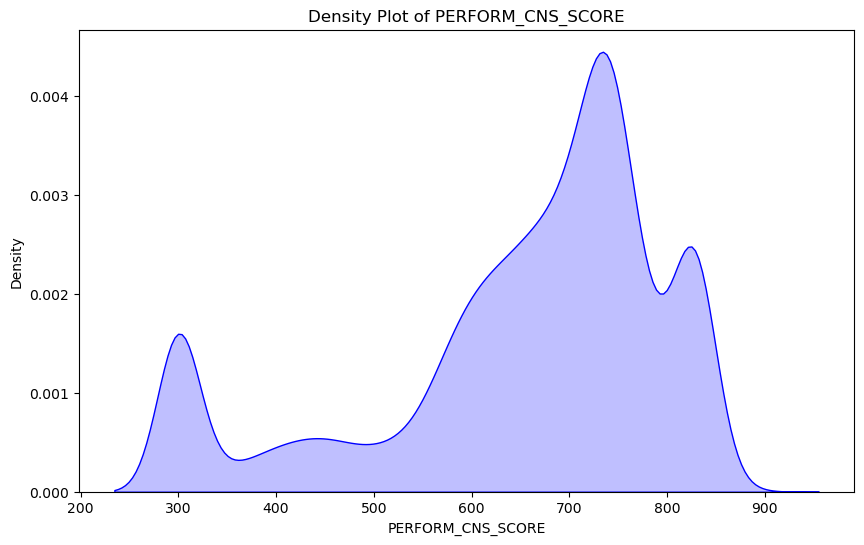

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(with_credit_score_df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()

# Credit Score Distributions

There looks to be a large distribution of credit scores and history length but the majority fall in the 0 score and 0 months in credit history bucket. This combined with the relatively high (23%) early default rate of the dataset help to explain what kind of borrowers we are looking at. Just over half of all observations in this dataset have a 0 score.

In [25]:
default_df = df[df['LOAN_DEFAULT'] == 1].reset_index(drop=True)
paid_df = df[df['LOAN_DEFAULT'] == 0].reset_index(drop=True)

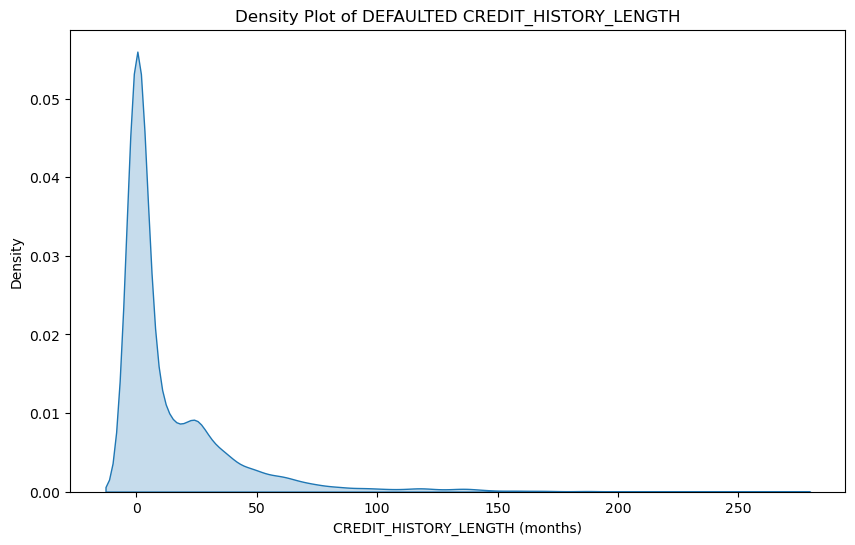

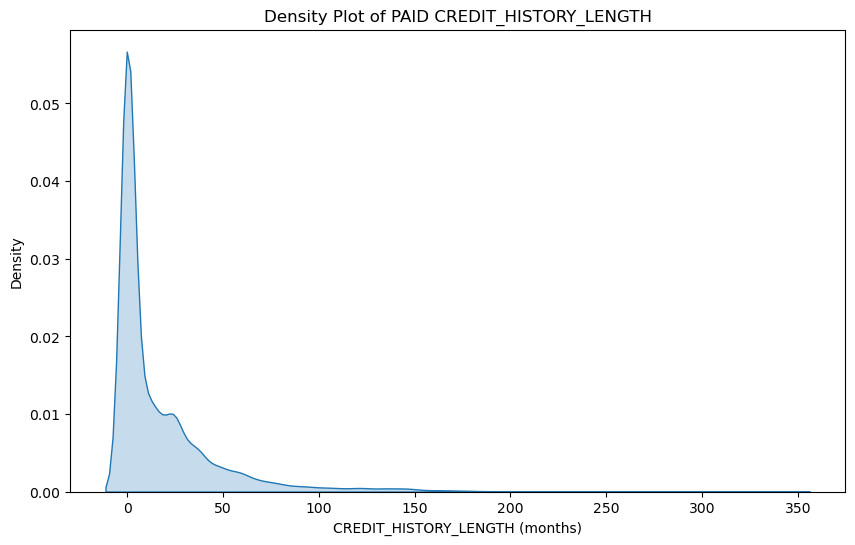

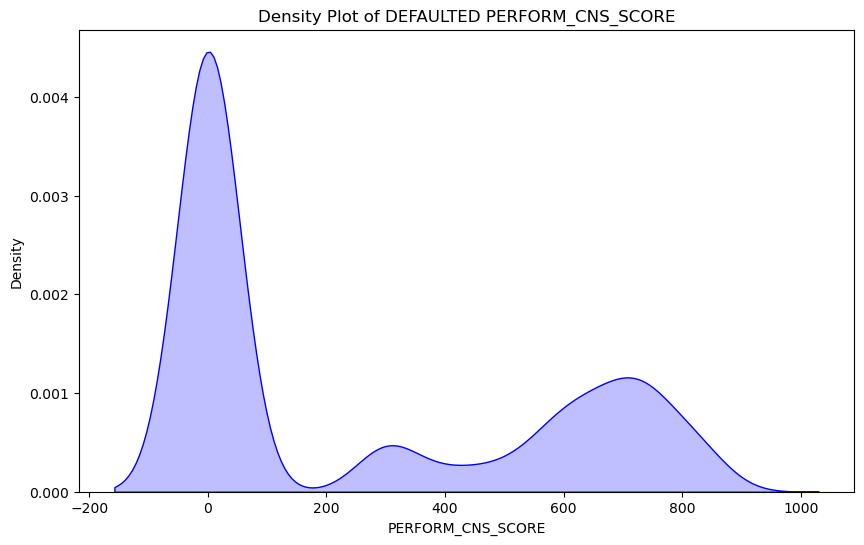

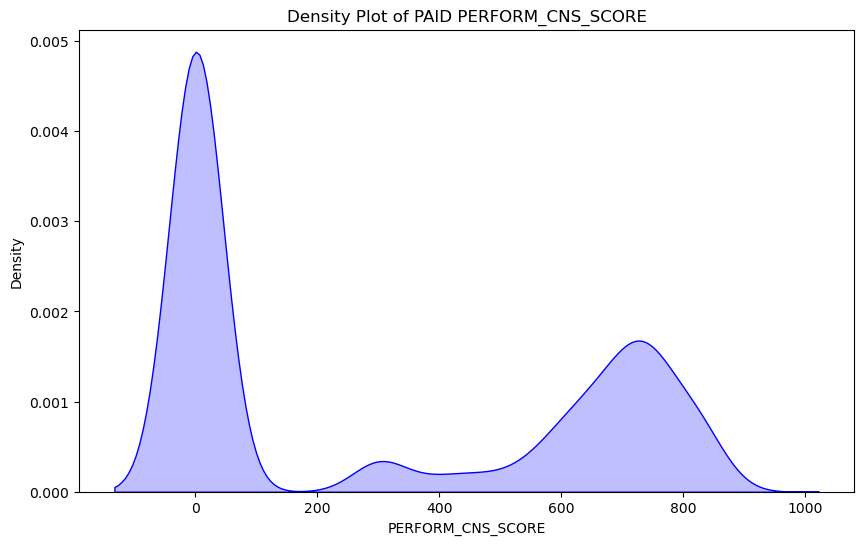

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(default_df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of DEFAULTED CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(paid_df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of PAID CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(default_df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of DEFAULTED PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(paid_df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of PAID PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()

# Note on Credit Values

As you can see in the prior cells, the credit scoring is not very visually different in the event of a default or on-time payment. While there are some differences like the higher frequency of a 0 score for defaults and higher frequency of 600-800 scores for on-time payments, they are not drastically different. This likely means that these parameters will not be as useful in our prediction.

In [27]:
pd.set_option('display.max_columns', None)

df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,647847,58513,79332,75.63,159,24406,86,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,581370,53803,73917,74.41,159,24406,86,Self employed,1,630,1,1,0,260344,0,0,0,0,0,0,0,0,0,0,0,0,49,49,0,0
2,647507,77318,172336,47.00,159,24307,67,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,612111,73317,101215,74.10,159,24406,86,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,509765,56759,67666,85.72,159,24406,86,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
df.loc[df['DISBURSED_AMOUNT'] > 150000]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
4766,468081,151348,205427,76.43,79,24064,67,Self employed,1,392,2,1,0,472601,450000,450000,0,0,0,0,0,0,450000,0,0,0,29,40,1,0
4789,491530,180990,220857,85.12,79,24064,67,Self employed,1,694,6,3,0,2864667,4196397,4196397,0,0,0,0,0,0,14999,0,1,0,16,38,0,0
9309,566704,165368,225711,74.48,34,16556,86,Salaried,1,556,13,10,0,289614,1084209,1041911,0,0,0,0,0,0,5001,0,2,1,24,49,0,0
13402,488582,315904,378092,84.64,138,24062,152,Salaried,1,670,7,6,0,1352433,2386822,2131476,0,0,0,0,0,0,11033,0,0,0,38,74,0,0
13403,491653,196998,378092,52.90,138,24062,152,Salaried,1,796,7,5,0,2317306,2806384,2791305,0,0,0,0,0,0,23728,0,0,0,45,122,0,0
13404,440173,990572,1628992,61.39,138,24062,152,NaN,1,16,1,0,1,0,0,0,0,0,0,0,0,0,6224,0,0,0,70,70,0,0
13405,585144,318533,388025,84.79,138,24062,152,Self employed,1,645,45,14,0,4328346,8292063,8293557,0,0,0,0,0,0,45117,0,3,0,17,67,1,0
13406,560171,237779,383600,62.57,138,24062,152,Salaried,1,778,5,1,0,21778,45500,52730,0,0,0,0,0,0,25807,0,0,0,30,66,0,0
13407,489321,592460,715186,83.89,138,24062,152,Salaried,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
30117,606666,170146,195661,89.00,2,24587,67,Salaried,1,739,4,1,0,0,35000,35000,0,0,0,0,0,0,17,0,0,0,12,35,0,1


In [29]:
df = df[df['DISBURSED_AMOUNT'] < 150000]

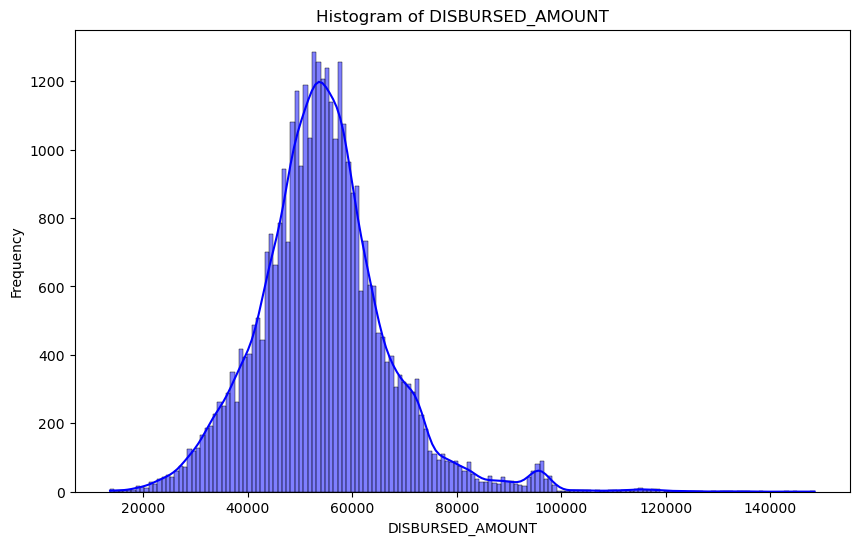

In [30]:
filtered_disbursed_amount_df = df[df['DISBURSED_AMOUNT'] < 150000]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(filtered_disbursed_amount_df['DISBURSED_AMOUNT'], kde=True, color='blue')
plt.title('Histogram of DISBURSED_AMOUNT')
plt.xlabel('DISBURSED_AMOUNT')
plt.ylabel('Frequency')
plt.show()

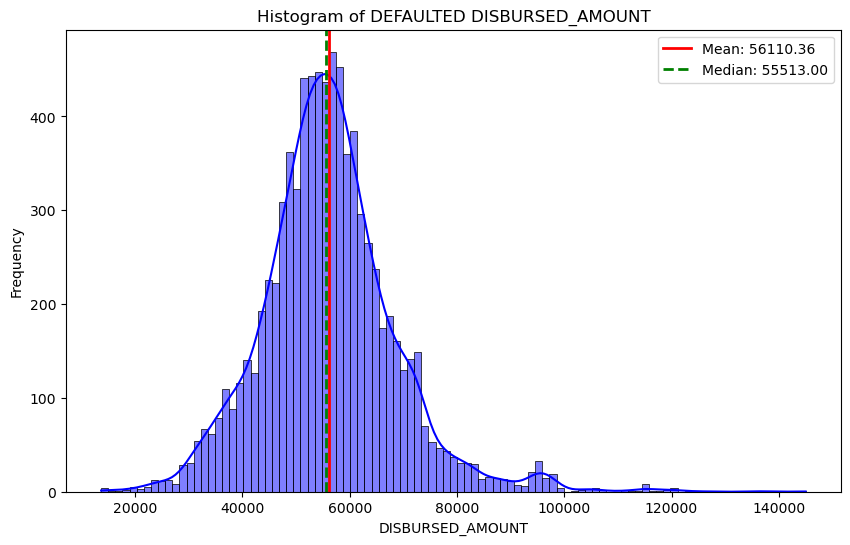

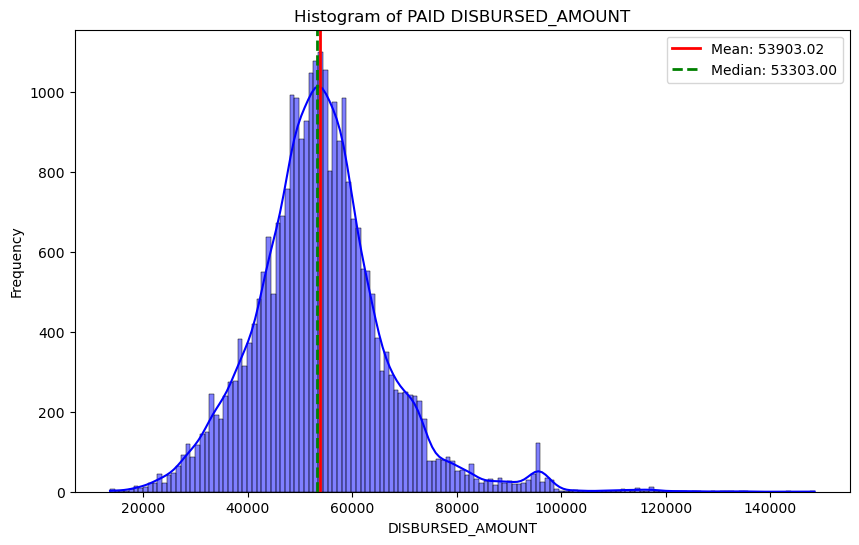

In [31]:
filtered_default_disbursed_amount_df = default_df[default_df['DISBURSED_AMOUNT'] < 150000]


mean_default = filtered_default_disbursed_amount_df['DISBURSED_AMOUNT'].mean()
median_default = filtered_default_disbursed_amount_df['DISBURSED_AMOUNT'].median()


plt.figure(figsize=(10, 6))
sns.histplot(filtered_default_disbursed_amount_df['DISBURSED_AMOUNT'], kde=True, color='blue')
plt.axvline(mean_default, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_default:.2f}')
plt.axvline(median_default, color='green', linestyle='--', linewidth=2, label=f'Median: {median_default:.2f}')
plt.title('Histogram of DEFAULTED DISBURSED_AMOUNT')
plt.xlabel('DISBURSED_AMOUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()


filtered_paid_disbursed_amount_df = paid_df[paid_df['DISBURSED_AMOUNT'] < 150000]


mean_paid = filtered_paid_disbursed_amount_df['DISBURSED_AMOUNT'].mean()
median_paid = filtered_paid_disbursed_amount_df['DISBURSED_AMOUNT'].median()


plt.figure(figsize=(10, 6))
sns.histplot(filtered_paid_disbursed_amount_df['DISBURSED_AMOUNT'], kde=True, color='blue')
plt.axvline(mean_paid, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_paid:.2f}')
plt.axvline(median_paid, color='green', linestyle='--', linewidth=2, label=f'Median: {median_paid:.2f}')
plt.title('Histogram of PAID DISBURSED_AMOUNT')
plt.xlabel('DISBURSED_AMOUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

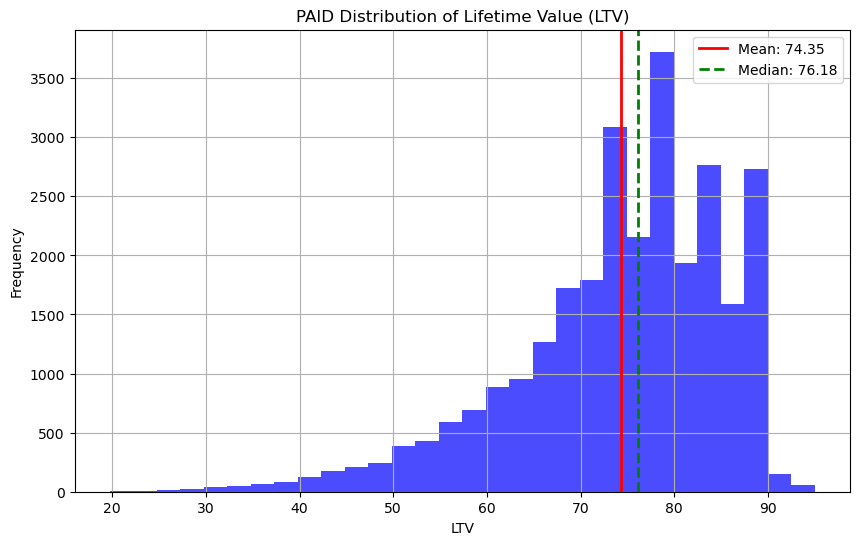

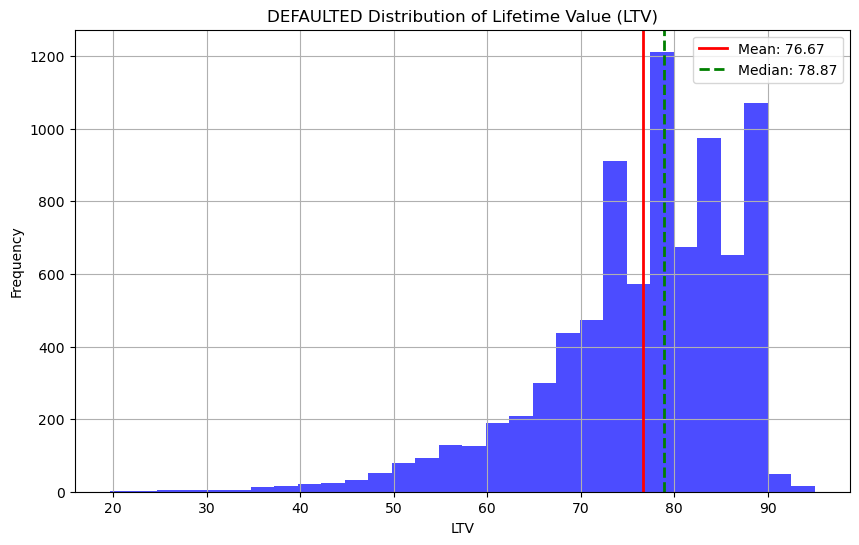

In [32]:
mean_paid_LTV = paid_df['LTV'].mean()
median_paid_LTV = paid_df['LTV'].median()


plt.figure(figsize=(10, 6))
plt.hist(paid_df['LTV'], bins=30, color='blue', alpha=0.7)
plt.axvline(mean_paid_LTV, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_paid_LTV:.2f}')
plt.axvline(median_paid_LTV, color='green', linestyle='--', linewidth=2, label=f'Median: {median_paid_LTV:.2f}')
plt.xlabel('LTV')
plt.ylabel('Frequency')
plt.title('PAID Distribution of Lifetime Value (LTV)')
plt.grid(True)
plt.legend()
plt.show()


mean_default_LTV = default_df['LTV'].mean()
median_default_LTV = default_df['LTV'].median()


plt.figure(figsize=(10, 6))
plt.hist(default_df['LTV'], bins=30, color='blue', alpha=0.7)
plt.axvline(mean_default_LTV, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_default_LTV:.2f}')
plt.axvline(median_default_LTV, color='green', linestyle='--', linewidth=2, label=f'Median: {median_default_LTV:.2f}')
plt.xlabel('LTV')
plt.ylabel('Frequency')
plt.title('DEFAULTED Distribution of Lifetime Value (LTV)')
plt.grid(True)
plt.legend()
plt.show()

# Note on LTV and Disbursed Amount

There is a considerable difference between the defaulted and well paid datasets when it comes to these two parameters. This likely means that they will be useful in predicting an individual early default. This will come up later when we are going through the classification model.

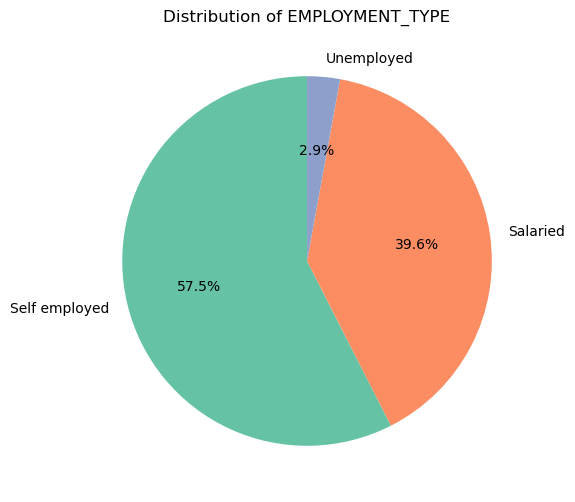

In [33]:
employment_graph_df = df[['EMPLOYMENT_TYPE']].fillna(value='Unemployed')

plt.figure(figsize=(8, 6))
employment_graph_df['EMPLOYMENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of EMPLOYMENT_TYPE')
plt.ylabel('')
plt.show()

In [34]:
# Relatively small percentage of NAN values that were converted to 'Unemployed'

In [35]:
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna('Unemployed')

C:\Users\Carter\AppData\Local\Temp\ipykernel_325552\1965694546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna('Unemployed')


# Thinking about columns to evaluate

Some columns such as Supplier ID and Branch ID may correlated to loan defaults but these would be incredibly inefficient to separate into categorical columns. Below we will impliment a way to evaluate this columns in a simpler and more efficient way than their binary representation.

In [36]:

def add_risk_column(dataframe, col, percentage):
    
    target_counts = df[col].value_counts().reset_index()
    target_defaults = df.groupby([col])['LOAN_DEFAULT'].sum().reset_index()

    target_df = pd.merge(target_counts, target_defaults, how= 'left', left_on= col, right_on= col)

    target_df['Target_Percent_Defaults'] = target_df['LOAN_DEFAULT'] / target_df['count']

    target_df[f'{col}_RISK'] = [1 if percent_default > percentage else 0 for percent_default in target_df['Target_Percent_Defaults']]
    
    target_df = target_df.drop(columns=['count', 'LOAN_DEFAULT', 'Target_Percent_Defaults'], axis= 1)
    
    final_df = pd.merge(df, target_df, how= 'left', left_on= col, right_on= col)
    
    return final_df

In [37]:
df = add_risk_column(df, 'SUPPLIER_ID', .33)
df = add_risk_column(df, 'BRANCH_ID', .33)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,SUPPLIER_ID_RISK,BRANCH_ID_RISK
0,647847,58513,79332,75.63,159,24406,86,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,581370,53803,73917,74.41,159,24406,86,Self employed,1,630,1,1,0,260344,0,0,0,0,0,0,0,0,0,0,0,0,49,49,0,0,0,0
2,647507,77318,172336,47.00,159,24307,67,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,612111,73317,101215,74.10,159,24406,86,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,509765,56759,67666,85.72,159,24406,86,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting features and target variable
features = ['DISBURSED_AMOUNT', 'LTV', 'EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE', 'CREDIT_HISTORY_LENGTH', 'PRI_OVERDUE_ACCTS', 'SEC_OVERDUE_ACCTS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'SUPPLIER_ID_RISK', 'BRANCH_ID_RISK', 'NO_OF_INQUIRIES', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'PRI_NO_OF_ACCTS', 'PRI_DISBURSED_AMOUNT']
target = 'LOAN_DEFAULT'

X = df[features]
y = df[target]

# Encoding categorical variables
X = pd.get_dummies(X, columns= ['EMPLOYMENT_TYPE'])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      5597
           1       0.34      0.54      0.42      1662

    accuracy                           0.66      7259
   macro avg       0.59      0.61      0.59      7259
weighted avg       0.72      0.66      0.68      7259



# Fitting a simple logistic regression model

As you can see, fitting a regression model with the specified parameters does not guarantee a well fit model. While this one was able to predict the well paid loans with 83% accuracy, the defaulted loans were only predicted correctly 34% of the time. This is likely due to the model having almost 77% of well paid loans and only 23% of defaulted loans to evaluate. In the above logistic regression model we also used a 'balanced' weighting which does not take into account the different importances of the individual predictors (i.e. LTV and Disbursed AMT over Credit scores).

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Hyperparameter Grid
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None] + list(np.arange(10, 21, 5)),
    'min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=30, 
                                   cv=3, 
                                   random_state=42, 
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

# Best Model
clf_tuned = random_search.best_estimator_

# Predictions and Evaluation for Tuned Random Forest
y_pred_tuned = clf_tuned.predict(X_test)
y_pred_proba_tuned = clf_tuned.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_tuned))

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      5597
           1       0.53      0.04      0.07      1662

    accuracy                           0.77      7259
   macro avg       0.65      0.51      0.47      7259
weighted avg       0.72      0.77      0.69      7259



In [80]:
threshold = 0.7
y_pred_tuned_adjusted = (y_pred_proba_tuned >= threshold).astype(int)

# Model Evaluation
print("Classification Report for Tuned Random Forest with Adjusted Threshold:")
print(classification_report(y_test, y_pred_tuned_adjusted))

Classification Report for Tuned Random Forest with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5597
           1       1.00      0.00      0.00      1662

    accuracy                           0.77      7259
   macro avg       0.89      0.50      0.44      7259
weighted avg       0.82      0.77      0.67      7259



# Adjusting the Decision Threshold for Better Default Predictions

In imbalanced datasets, like loan default prediction, the default decision threshold (0.5) may not be optimal. increasing the threshold increases the model's sensitivity to predicting defaults, improving recall at the cost of more false positives. This is crucial for lenders because the cost of a missed default (false negative) is much higher than a false positive.

For example, adjusting the threshold from 0.5 to 0.7 increases the recall for defaults, ensuring more defaults are identified, which helps in minimizing financial losses. Balancing this trade-off is essential for effective credit risk management.

The Random Forest Classifier likely performs better for this model because of it's ability to get multiple regression models that better capture the loan defaults and impliment them in the final model. While this seems to be a great model for classifying the dataset, it may not be useful in real application because of the black-box nature of random forest.